# Version de jupyter de main_svm

## Importaciones

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from NObSP_Decomposition import NObSP_SVM_single, NObSP_SVM_2order
from sklearn.metrics.pairwise import linear_kernel,polynomial_kernel,rbf_kernel,laplacian_kernel,sigmoid_kernel,chi2_kernel
from sklearn.model_selection import train_test_split
from kernel_comp import kernel_comp

## Datos

In [2]:
N = 1000; # Defining the number of datapoints
kernel_used = 'rbf' # Selecting th ekernel to be used

# Input variables
x0 = np.random.randn(N,)/3
x1 = np.random.randn(N,)/3
x2 = np.random.randn(N,)/3
x3 = np.random.randn(N,)
x4 = np.random.randn(N,)/3

In [3]:
# Nonlinear functions definition
g0 = np.abs(x0)
g1 = x1**3
g2 = np.exp(x2)
g3 = np.sin(2*x3)
g4 = np.zeros(N,) # Notice that the contribution of x4 on the output is zero.
g01 = 1*np.exp((x0+x1)) # Second order interaction effect
noise = 0.01*np.random.randn(N,) # noise vector

In [4]:
# Generating the model output
y =  g0 + g1 + g2 + g3 + g4 + noise # Simulation done using only first order interactions in the output.
y2 =  g0 + g1 + g2 + g3 + g4 + g01 + noise # Simulation done using second order interactions in the output.

In [5]:
# Generating the input matriz for training
X = np.stack((x0, x1, x2, x3, x4), axis=1)
t = np.arange(0,N)

In [6]:
X

array([[ 0.21252022,  0.10734727, -0.27841558, -0.25890141, -0.0191709 ],
       [-0.47795505, -0.54444271, -0.3333226 , -0.92846788,  0.09730845],
       [-0.82453361,  0.03321336,  0.14814539, -0.14717818,  0.45930664],
       ...,
       [ 0.00721238, -0.2016383 ,  0.11790009,  1.6300321 ,  0.37025526],
       [-0.2814437 , -0.1319244 , -0.032912  ,  0.96217721, -0.05885364],
       [-0.10259322, -0.40577186, -0.04553772,  0.09582065, -0.4924883 ]])

## Regresión

In [7]:
regressor_1 = SVR(kernel = kernel_used) # Creating the regression model
regressor_1.fit(X, y) # Fitting the model to the data
y_est_1 = regressor_1.predict(X) # Prediction of the output in training data
Xsv_1 = regressor_1.support_vectors_# Extracting the support vectors 

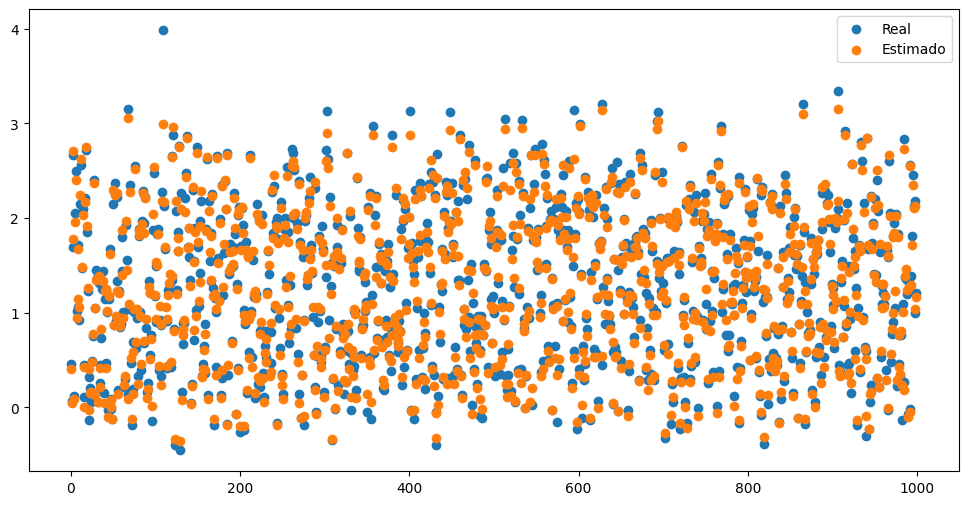

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(t,y, label = 'Real') # Estimated output vs real output
ax.scatter(t, y_est_1, label = 'Estimado')
plt.legend()
plt.show()

## Descomposición

In [9]:
P_xy, y_e_1, Alpha_1 = NObSP_SVM_single(X, Xsv_1, y_est_1, regressor_1)

In [10]:
K_1 = kernel_comp(X, Xsv_1, regressor_1) # computing the kernel for the training data
y_e_Alpha_1 = K_1@Alpha_1 # Obtaining the estimated decomposition using the Alpha coefficients, out-of-sample extension)

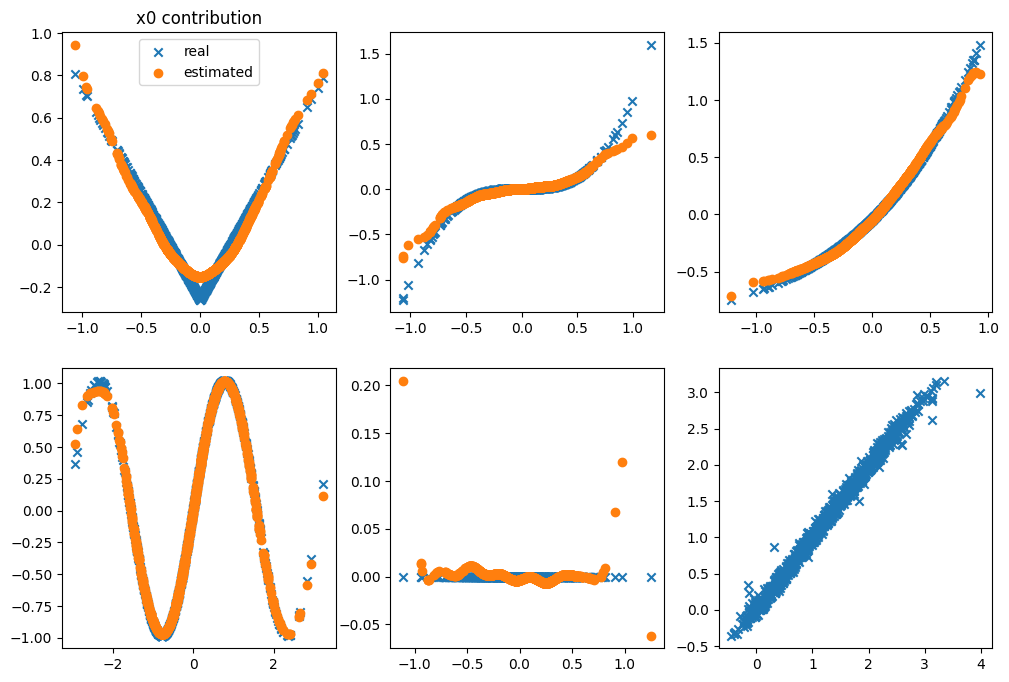

In [11]:
# Plotting the decomposition
fig, axs = plt.subplots(2, 3, figsize=(12,8))

axs[0,0].scatter(x0, g0-g0.mean(), marker='x', label = 'real') # Real nonlienar contribution of x0 on the output 
axs[0,0].scatter(x0, y_e_1[:,0]-y_e_1[:,0].mean(), marker='o', label = 'estimated') # Estimated nonlinear contribution of x0 on the output
axs[0,0].set_title('x0 contribution')
axs[0,0].legend()

axs[0,1].scatter(x1, g1-g1.mean(), marker='x') # Real nonlienar contribution of x1 on the output
axs[0,1].scatter(x1, y_e_1[:,1]-y_e_1[:,1].mean(), marker='o') # Estimated nonlinear contribution of x1 on the output

axs[0,2].scatter(x2, g2-g2.mean(), marker='x') # Real nonlienar contribution of x2 on the output
axs[0,2].scatter(x2, y_e_1[:,2]-y_e_1[:,2].mean(), marker='o') # Estimated nonlinear contribution of x2 on the output

axs[1,0].scatter(x3, g3-g3.mean(), marker='x') # Real nonlienar contribution of x3 on the output
axs[1,0].scatter(x3, y_e_1[:,3]-y_e_1[:,3].mean(), marker='o') # Estimated nonlinear contribution of x3 on the output

axs[1,1].scatter(x4, g4-g4.mean(), marker='x') # Real nonlienar contribution of x4 on the output
axs[1,1].scatter(x4, y_e_1[:,4]-y_e_1[:,4].mean(), marker='o') # Estimated nonlinear contribution of x04 on the output

axs[1,2].scatter(y, y_est_1, marker='x') # Calibration plot real output vs estiamted output
plt.show()